In [25]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

from activation_functions import Tanh, Sigmoid
from mse import mse, mse_derivative
from mlp import Dense, train, predict
from utils import get_config_params, get_data, get_training_amount
from mpl_toolkits.mplot3d import Axes3D

In [18]:
config = {
    "ej": 2,
    "learning_rate": 0.01,
    "training_percentage": 0.5,
    "max_epochs": 1000,
    "bias": 1,
    "beta": 1,
    "epsilon": 0.5,
    "optimizer": "ADAM"
}

In [19]:
ej, learning_rate, training_percentage, max_epochs, bias, beta, epsilon, optimizer = get_config_params(config)

input_data, expected_data = get_data(2)
training_amount = get_training_amount(len(input_data), training_percentage)

flattened_input = []
for i in range(len(input_data)):
    flattened_input.append([item for sublist in input_data[i] for item in sublist])

training_set = flattened_input[:training_amount]
training_expected = expected_data[:training_amount]
testing_set =  np.reshape(flattened_input[training_amount:], (len(input_data)-training_amount, 35, 1))
testing_expected = expected_data[training_amount:]
X = np.reshape(training_set, (training_amount, 35, 1))
Y = np.reshape(training_expected, (training_amount, 1, 1))
# print(X)
print(Y)

[[[0]]

 [[1]]

 [[0]]

 [[1]]

 [[0]]]


In [20]:
network = [
        Dense(35, 32, optimizer_type=optimizer),
        Sigmoid(),
        Dense(32, 2,optimizer_type=optimizer),
        Sigmoid()
    ]
network


In [21]:
# train
train(network, mse, mse_derivative, X, Y, epochs=10000)

1/10000, error=0.3471013584371761
2/10000, error=0.34138334936747217
3/10000, error=0.33589208656790437
4/10000, error=0.33016653721709227
5/10000, error=0.32416934796709096
6/10000, error=0.3179048562281595
7/10000, error=0.31140074006629814
8/10000, error=0.30470508179589884
9/10000, error=0.297884984371468
10/10000, error=0.29102419466236495
11/10000, error=0.28421891896652923
12/10000, error=0.27757158124457
13/10000, error=0.27118278878603735
14/10000, error=0.2651424066028246
15/10000, error=0.25952124743259486
16/10000, error=0.2543651299541691
17/10000, error=0.24969266719968827
18/10000, error=0.24549715741841246
19/10000, error=0.24175177701896552
20/10000, error=0.23841646940295136
21/10000, error=0.23544480022988376
22/10000, error=0.2327895214741901
23/10000, error=0.23040630224556474
24/10000, error=0.22825569845749322
25/10000, error=0.22630377743429692
26/10000, error=0.22452189760564437
27/10000, error=0.22288606677784703
28/10000, error=0.22137616787747572
29/10000, e

In [22]:
points = []
for i in range(len(testing_set)):
    z = predict(network, testing_set[i])
    points.append([testing_set[i], testing_expected[i], z[0,0]])
for point in points:
    print(f"Input:" +
        #    {point[0]} +
             f"Expected:{point[1]} Result:{point[2]}")

Input:Expected:1 Result:0.0015294156802491022
Input:Expected:0 Result:0.14536205250087594
Input:Expected:1 Result:0.00020073687672408948
Input:Expected:0 Result:0.9609261892073574
Input:Expected:1 Result:0.1845277948010386


### Qué pasa si cambiamos la network?  

In [33]:

# La network siempre tiene 35 entradas y 2 salidas

MAX_NODES_BY_LAYER = 15
MAX_LAYERS = 3
NODE_INCREMENT = 3

iteration = 0
results = []
for node_count in range(NODE_INCREMENT, MAX_LAYERS * MAX_NODES_BY_LAYER + 1, NODE_INCREMENT):
    print(f"ITERATION {iteration}")
    iteration += 1
    

    layer_count = math.floor(node_count/MAX_NODES_BY_LAYER)
    network2 = []

    # La primera capa tiene siempre 35 entradas
    limited_node_count = node_count if node_count < MAX_NODES_BY_LAYER else MAX_NODES_BY_LAYER
    network2.append(Dense(35, limited_node_count, optimizer_type=optimizer))
    network2.append(Sigmoid())


    last_layer_output_count = limited_node_count
    for layer in range(layer_count):
        layer_output_count = node_count - layer * MAX_NODES_BY_LAYER
        limited_node_count = layer_output_count if layer_output_count < MAX_NODES_BY_LAYER else MAX_NODES_BY_LAYER

        network2.append(Dense(last_layer_output_count, limited_node_count, optimizer_type=optimizer))
        network2.append(Sigmoid())

        last_layer_output_count = limited_node_count


    # La ultima capa tiene siempre 2 salidas
    network2.append(Dense(last_layer_output_count, 2, optimizer_type=optimizer))
    network2.append(Sigmoid())


    # train
    train(network2, mse, mse_derivative, X, Y, epochs=5000, verbose=False)

    text = ["Capa 0: 35 Inputs\n"]
    for j in range(layer_count + 1):
        aux = node_count - j * MAX_NODES_BY_LAYER
        layer_nodes = aux if aux < MAX_NODES_BY_LAYER else MAX_NODES_BY_LAYER
        if(layer_nodes > 0):
            text.append(f"Capa {j+1}: {layer_nodes} nodos\n")
    text.append("Capa Final: 2 Outputs\n")
    final_text = "".join(text)

    points = []
    for i in range(len(testing_set)):
        z = predict(network2, testing_set[i])
        points.append([testing_set[i], testing_expected[i], z[0,0]])
    
    deltas = []
    for point in points:
        expected = point[1]
        predicted = point[2]

        deltas.append(abs(expected-predicted))
        print(f"Expected: {expected}\tResult: {predicted}\tDelta: {abs(expected-predicted)}")
    
    results.append({"text": final_text, "deltas": deltas})
    print("\n------------------------------------------------------------------\n")

ITERATION 0
Expected: 1	Result: 0.00505393165347425	Delta: 0.9949460683465258
Expected: 0	Result: 0.05633339133018789	Delta: 0.05633339133018789
Expected: 1	Result: 0.0023302849677387855	Delta: 0.9976697150322612
Expected: 0	Result: 0.8177053253572967	Delta: 0.8177053253572967
Expected: 1	Result: 0.08597755870694611	Delta: 0.9140224412930539

------------------------------------------------------------------

ITERATION 1
Expected: 1	Result: 0.015237105805522028	Delta: 0.9847628941944779
Expected: 0	Result: 0.37660083816464984	Delta: 0.37660083816464984
Expected: 1	Result: 0.0006792539978573953	Delta: 0.9993207460021426
Expected: 0	Result: 0.8772306166919764	Delta: 0.8772306166919764
Expected: 1	Result: 0.03996906415804687	Delta: 0.9600309358419531

------------------------------------------------------------------

ITERATION 2
Expected: 1	Result: 0.19753324404844325	Delta: 0.8024667559515568
Expected: 0	Result: 0.9783171537595241	Delta: 0.9783171537595241
Expected: 1	Result: 0.00102708

#### Graficos

15


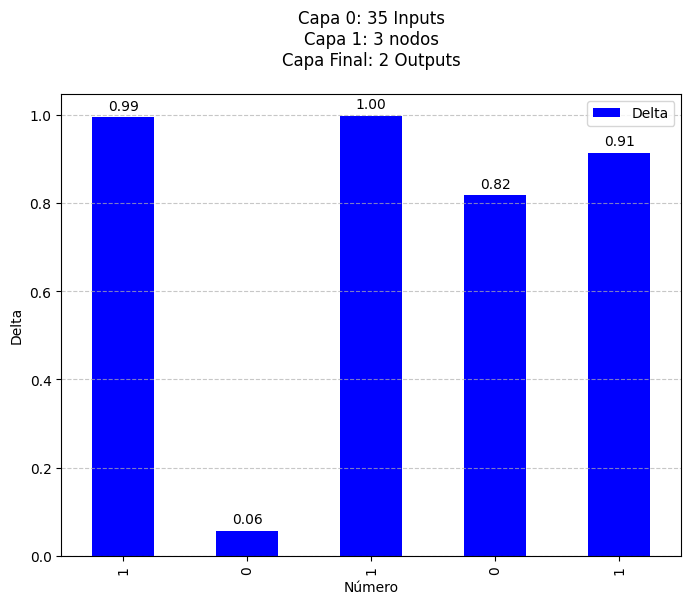

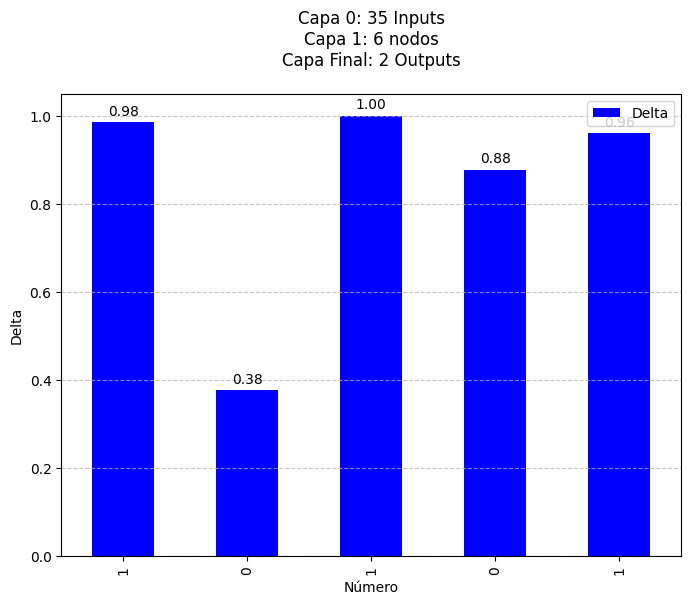

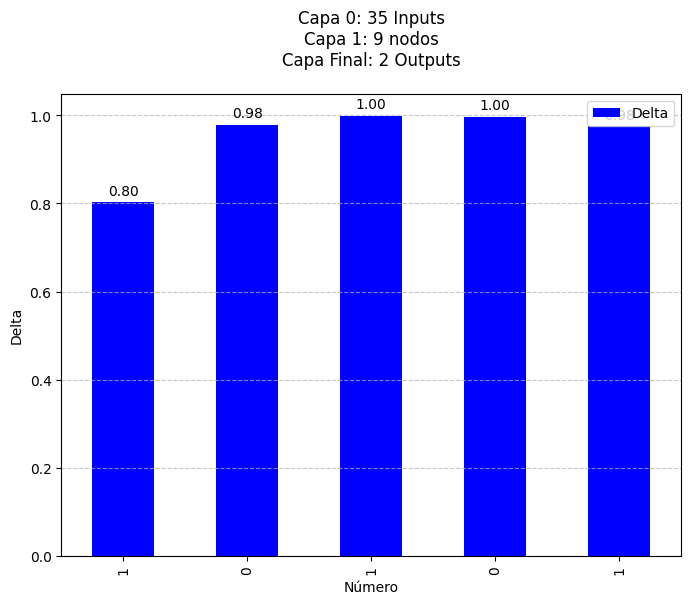

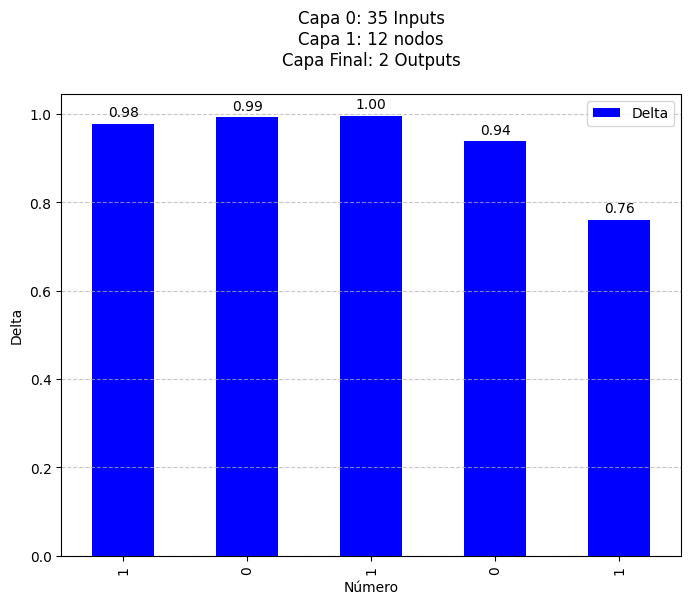

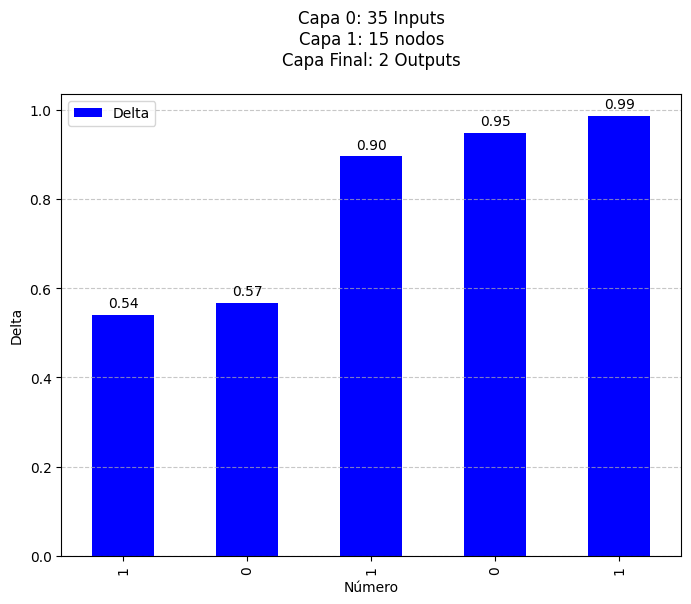

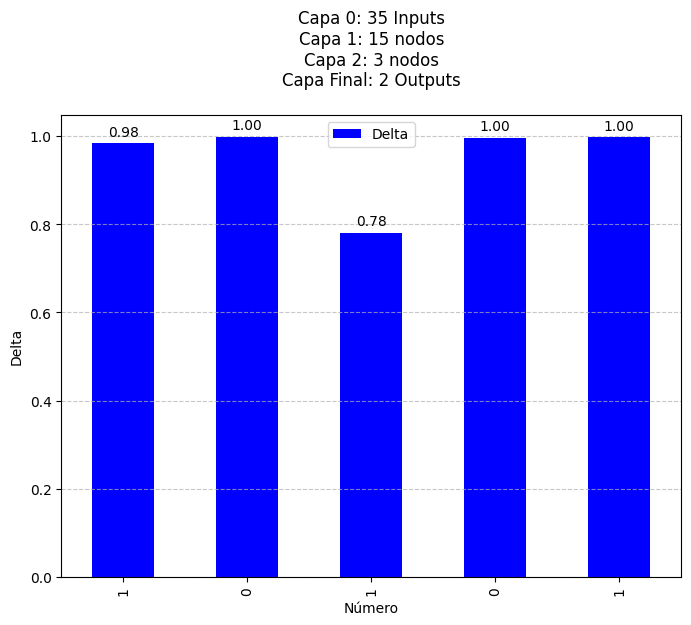

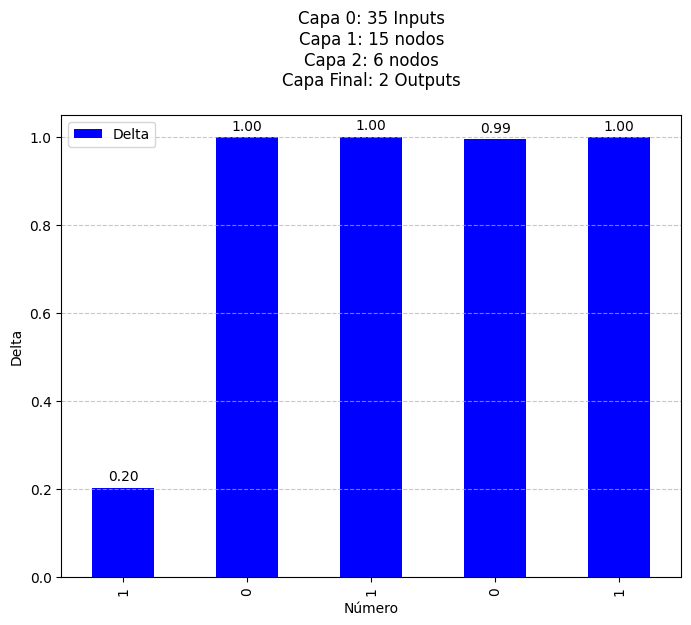

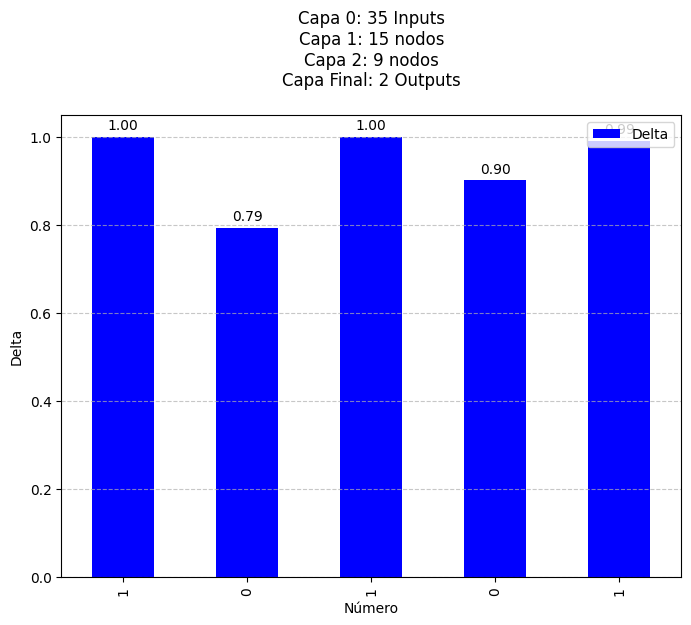

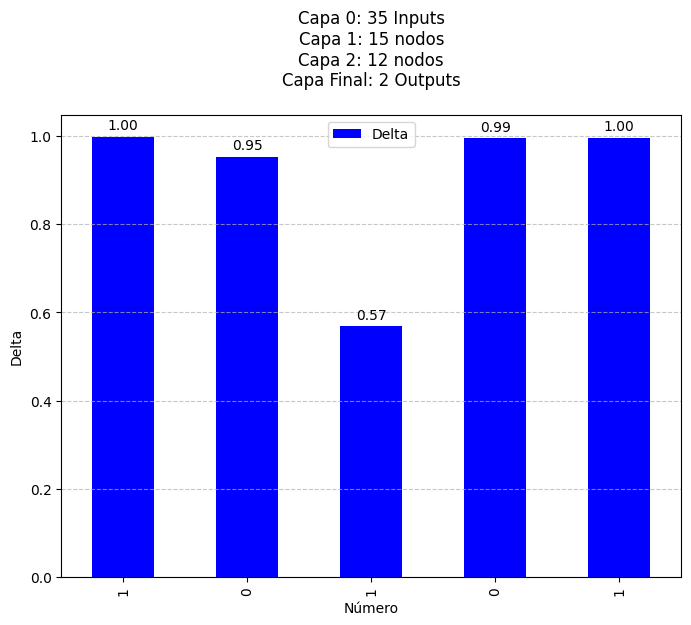

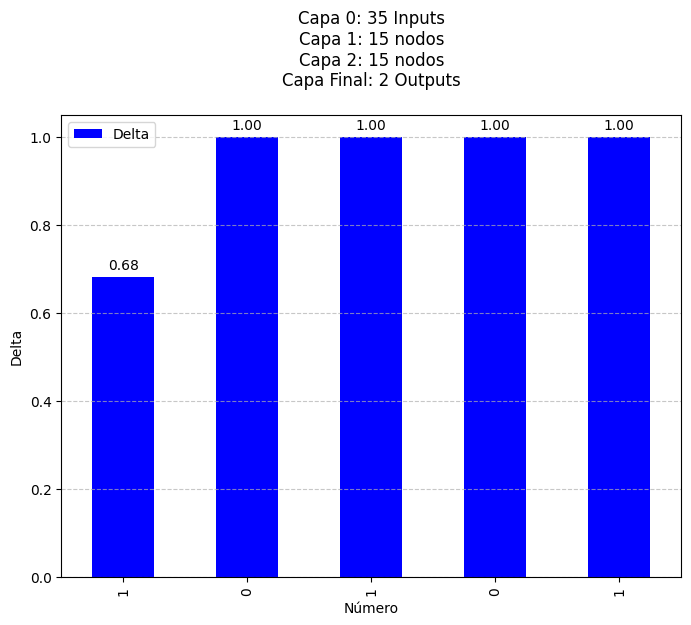

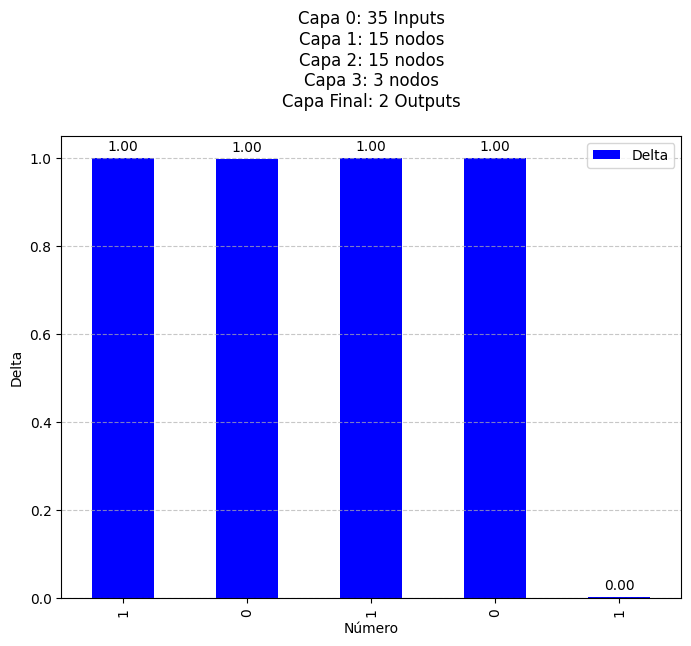

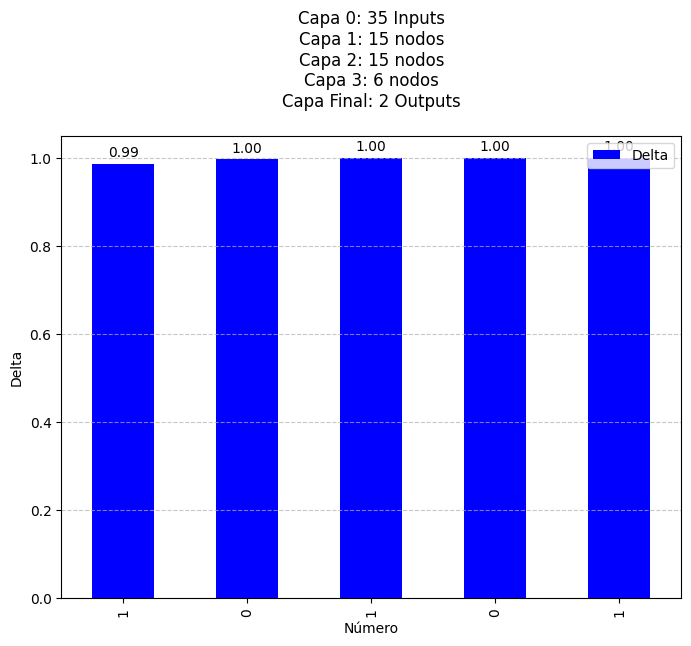

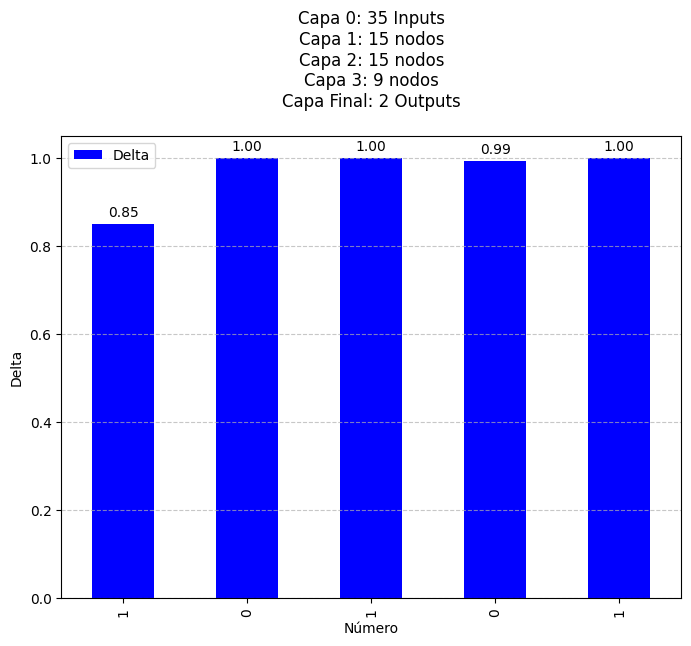

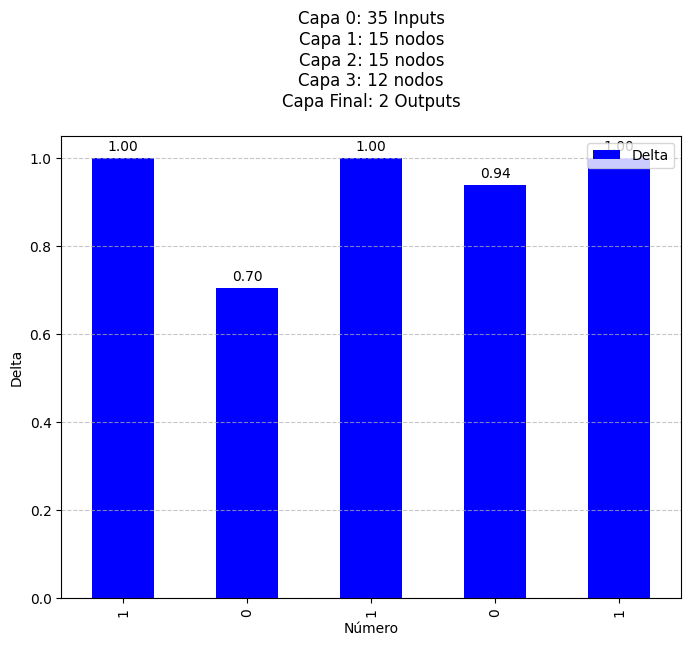

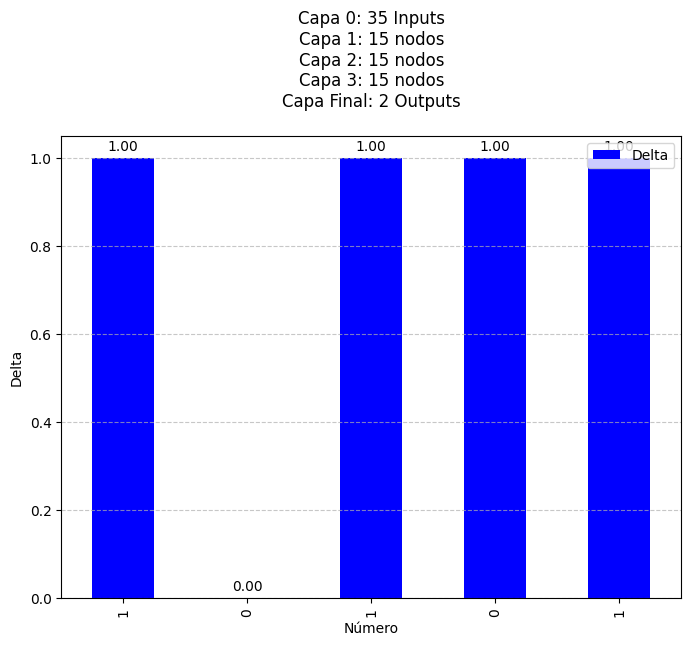

In [34]:
print(len(results))

for i in range(len(results)):

    numeros = [1, 0, 1, 0, 1]
    deltas = results[i]["deltas"]

    # Crear un DataFrame de Pandas a partir de las listas
    data = {'Número': numeros, 'Delta': deltas}
    df = pd.DataFrame(data)

    # Crear un gráfico de barras
    ax = df.plot(x='Número', y='Delta', kind='bar', figsize=(8, 6), color='blue')
    plt.xlabel('Número')
    plt.ylabel('Delta')
    plt.title(results[i]["text"])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir etiquetas a las barras
    for i, v in enumerate(deltas):
        ax.text(i, v + 0.01, f'{v:.2f}', horizontalalignment='center', verticalalignment='bottom')

    # Personalizar el eje x con los números
    ax.set_xticklabels(numeros)

    plt.show()